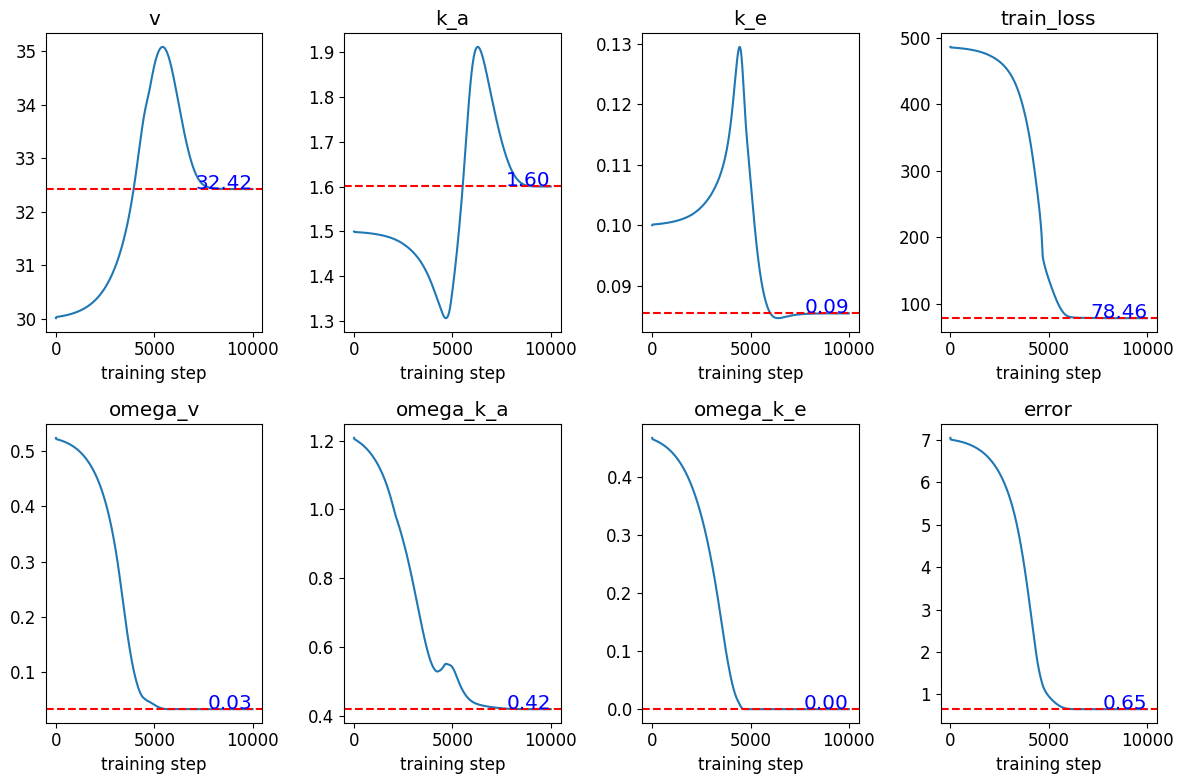

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

from pathlib import Path
from typing import Dict, Tuple
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
directory_path = Path("../lightning_logs/theo_dataset/base_model_seed_42/")
version = sorted([entry for entry in directory_path.iterdir() if entry.is_dir()])[-1]
event = sorted(list(version.glob('event*')))[0]
event_acc = EventAccumulator(str(event))
event_acc.Reload()

scalar_data_names = event_acc.Tags()['scalars']
for name in ['hp_metric', 'epoch', 'val_loss']:
    scalar_data_names.remove(name)
scalar_data_names

def get_value_by_train_step(event_acc, names):
    fig, axs = plt.subplots(2, 4, figsize=(12, 8))
    axs = axs.flatten()
    for i, name in enumerate(names) :
        event = event_acc.Scalars(name)
        x = [e.step for e in event]  # X-axis data
        y = [e.value for e in event]  # X-axis data
        axs[i].plot(x, y)
        axs[i].set_title(name)
        axs[i].set_xlabel('training step')
        # axs[i].set_ylabel(name)
        axs[i].axhline(y=y[-1], color='r', linestyle='--')
        axs[i].text(x[-1], y[-1], f'{y[-1]:.2f}', color='blue', ha='right', fontsize = 'large')
    plt.tight_layout()
    rcParams['font.size']=12
    plt.show()

get_value_by_train_step(event_acc, ['v', 'k_a', 'k_e', 'train_loss','omega_v','omega_k_a','omega_k_e', 'error'])